___

___
# Descriptive Statistics using python: Part 1



### What is Python ? Why use it in statistics ?

## Mean, Standard deviation and Skewness

In this Course, we will be defining descriptive statistics parameters and calculating mean of distribution using python with :
- Functions we will develop (  using functions and a Class Method )
- Statistics built-in functions from numpy package

We will introduce also normal distribution, discrete uniform distribution and some code speed Up Technics

Let's take a look!

---

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

I.  [Mathematical Introduction](#0)<br>
II.  [Coding Practise](#1)<br>
III.  [Different distributions and mean](#2)<br>
IV.  [Numpy built-in functions](#3)<br>
    </div>
    <hr>

# I. Mathematical Introduction <a id="0"></a>

In this section, we will explore mathematical formulas and signification of the mean and the standard deviation


In [213]:
### Imports we'll be using later
import time
import timeit
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Mean, what is it and when to use it ?

The mean or arithmetic mean is the sum of all values divided by the total number of values

The mean gives informations about the dataset, and can provide insights into the data.

<div class="alert alert-block alert-info">
<b>Tip:</b>. 
It’s the most commonly used measure of central tendency and is often referred to as the "average".
</div>

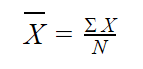
- X̄ or μ
- ΣX = sum of each value in the population
- N = number of values in the population

### Standard deviation, what is it and when to use it ?

The standard deviation is the average amount of variability in a dataset.

It tells us, on average, how far each value lies from the mean.

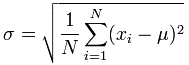

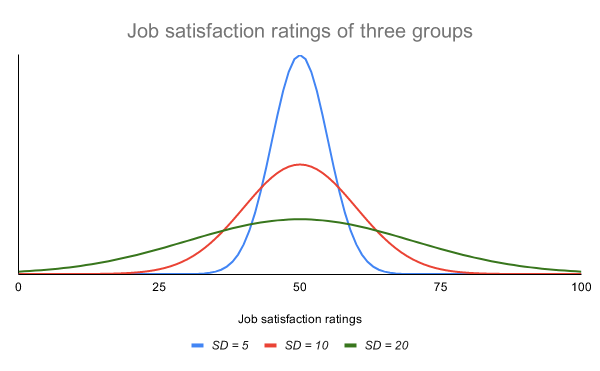

<div class="alert alert-block alert-info">
<b>Tip:</b>. 
A high standard deviation means that values are generally far from the mean, while a low standard deviation indicates that values are clustered close to the mean
</div>

## Example
Let's consider a basic distribution where each person has a certain number of apples

| Person | Number of Apples |
| --- | --- |
| A | 4 |
| B | 4 |
| C | 7 |
| D | 4 |
| E | 6 |

$$
  Mean=\frac{4+4+7+4+6}{5}=5
$$

**The mean number of apples or average apples held by someone in our group is : 5**

$$
  \sigma^2=\frac{{(4-5)^2}+{(4-5)^2}+{(4-5)^2}+{(4-5)^2}+{(6-5)^2}}{5}
   ;\sigma=1.264
$$

---

<div class="alert alert-block alert-warning">
<b>To see later:</b> Variance which is Std^2,Variance tells us the degree of spread in our data set,how far each value lies from the mean
</div>

Let's consider a another population

| Person | Number of Apples |
| --- | --- |
| A | 3 |
| B | 3 |
| C | 6 |
| D | 7 |
| E | 6 |

$$
  Mean=\frac{3+3+6+7+6}{5}=5
$$
**The mean number of apples or average apples held by someone in our group is : 5**

**The standard deviation is: 1.67**

<div class="alert alert-block alert-success">
<b>Bear in mind:</b> Differents distributions can have the same mean.
</div>

<div class="alert alert-block alert-danger">
<b>Just don't:</b> Consider the mean to be the most centered common value.
</div>

Let's add an extreme value to our Distribution

Person D now has 34 apples!!

| Person | Number of Apples |
| --- | --- |
| A | 4 |
| B | 4 |
| C | 7 |
| D | 34 |
| E | 6 |

$$
  Mean=\frac{4+4+7+34+6}{5}=11
$$
**The mean number of apples or average apples held by someone in our group is : 11**

**The standard deviation is : 11.55**

==> Only Person D has a number of apples higher than the mean, which mean our data is not well mean-distributed and is very impacted by the value 34.
==> We say, the value 34 **skews** our data

<div class="alert alert-block alert-success">
<b>Bear in mind:</b> Arithmetic mean is the sum of data-points divided by the number of data-points.

Advatanges:
* Simple to Understand and Calculate
* Finite and not affected by sample

Disadvantages:
* Not reprensetative when data contains extreme values, loss of informations
</div>

<div class="alert alert-block alert-success">
<b>Bear in mind:</b> Standard deviation can tell us how far our data-points spread from the mean.
</div>

----

### Skewness, what is it and what does it represent ?

Skewness is a measure of asymmetry or distortion of symmetric distribution.

A well Symetric distribution have no skewness.

**The measure of how asymmetric a distribution can be is calle:d skewness**

Let's explore some distributions and evaluate their skewness visually:

The probability density function of normal or gaussian distribution or bell shape is given by:
 

B | C
- | -
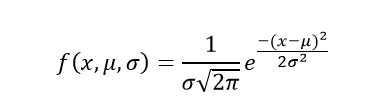 | ![alt](download.jpeg)

B | C
- | -
![alt](image2.jpg) | ![alt](image3.jpg)
more weight in the right tail of the distribution.|more weight in the left tail of the distribution.

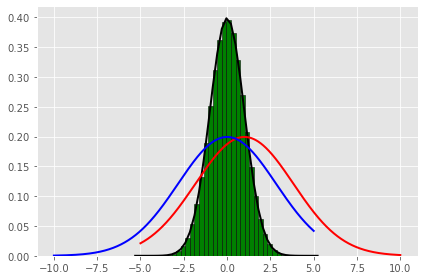

In [118]:
a=np.random.seed(102)
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 10000000)
#
count, bins, ignored = plt.hist(s, 40,edgecolor='black',color='g', density=True)
#y = lambda a : a + 10
y=[1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (x - mu)**2 / (2 * sigma**2) ) for x in bins] #list comprehension
plt.plot(
    bins, y,linewidth=2, color='black'
        )
#
mu2, sigma2 = 1, 2 # mean and standard deviation
x2 = np.linspace( -5,10, 1000000 )
y2 = 1./(sigma2*np.sqrt(2.*np.pi)) * np.exp( -.5*(x2-mu2)**2/ (2 * sigma2**2)  ) # scalar*list
plt.plot(
    x2, y2,linewidth=2, color='red'
        )
#
mu3, sigma3 = 0, 2 # mean and standard deviation
F=lambda a: 1./(sigma3*np.sqrt(2.*np.pi)) * np.exp( -.5*(a-mu3)**2/ (2 * sigma3**2)  ) # lambda function
x3 = np.linspace( -10,5, 1000000 )
y3 = F(x3)
plt.plot(
    x3, y3,linewidth=2, color='blue'
        )
#
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Bear in mind:</b> A symmetrical distribution has no skewness
</div>

<div class="alert alert-block alert-warning">
<b>To see later:</b> Measuring Skewness with various methods
</div>

# II. Coding Practise <a id="1"></a>

In this section, we will implement coding functions in order to calculate the mean

## Let's now code a function that calculates the mean
**We generate random values of an array ranging between 0 and 100 of length 10e6**

In [215]:
arr= np.random.randint(0,100,1000000)
arr[:10]

array([90, 38, 44, 12, 82, 13, 24,  0, 32, 13])

In [216]:
def calc_s_l(arr): # calculate the sum of array and the length of array
    s=0
    l=0
    for i,val in enumerate(arr): # instead of for i,val in zip(range(len(arr)),arr)
        s+=val
        l+=1
    return s,l
def calc_mean(arr): # calculate the mean of an array
    s,l=calc_s_l(arr)
    return s/l

*Enumerate() method adds a counter to an iterable and returns it in a form of enumerate object. This enumerate object can then be used directly in for loops or be converted into a list of tuples using list() method.*

In [217]:
s,l=calc_s_l(arr)
"Array Length:",l,'Array Sum:',s,'Array Mean:',calc_mean(arr)

('Array Length:', 1000000, 'Array Sum:', 49467355, 'Array Mean:', 49.467355)

### Let's wrap these two functions in a Class

In [219]:
class Funcs:
    def __init__(self, arr):
        self.arr = arr
    def SL(self): # calculate the sum of array and the length of array
        s=0
        l=0
        for i,val in enumerate(self.arr):
            s+=val
            l+=1
        self.sum=s
        self.length=l
        self.mean=self.sum/self.length
        return self.sum,self.length,self.mean

In [220]:
Arr_Object=Funcs(arr)
S,L,M=Arr_Object.SL()
"Array Length:",L,'Array Sum:',S,'Array Mean:',M

('Array Length:', 1000000, 'Array Sum:', 49467355, 'Array Mean:', 49.467355)

# III. Differents distributions and mean <a id="2"></a>

## Let's now plot different distributions and calculate their means
**We use same array as before**

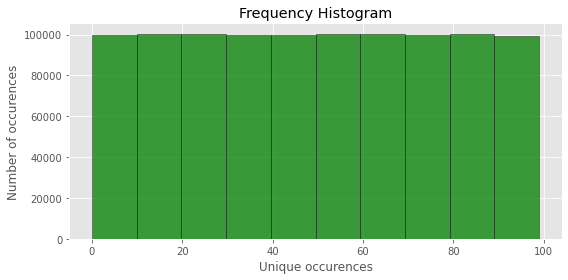

In [221]:
plt.figure(figsize=(8,4))
plt.hist(arr, bins=10,facecolor='g',edgecolor='black',alpha=0.75)
plt.gca().set(title='Frequency Histogram', ylabel='Number of occurences',xlabel='Unique occurences')
plt.tight_layout()
plt.show()

**numpy.random.randint¶ Return random integers from the “discrete uniform” distribution**

<div class="alert alert-block alert-info">
<b>Remember</b>. 
Discrete uniform distribution, a symmetric probability distribution where each outcomes has a likely equally probability of occuring
</div>

**Let's replace now some of our data with extreme values: ranging between 1000 and 1000**

In [191]:
arr2=arr
for i,val in enumerate(arr):
    if i%10==0:
        arr2[i]=np.random.randint(1000,10000)

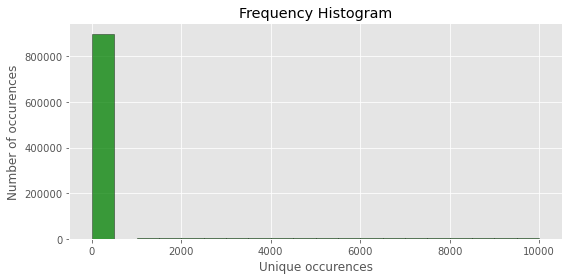

In [192]:
plt.figure(figsize=(8,4))
plt.hist(arr2, bins=20,facecolor='g',edgecolor='black',alpha=0.75)
plt.gca().set(title='Frequency Histogram', ylabel='Number of occurences',xlabel='Unique occurences')
plt.tight_layout()
plt.show()

In [197]:
Arr_Object=Funcs(arr2)
S,L,M=Arr_Object.SL()
"Array Length:",L,'Array Sum:',S,'Array Mean:',M

('Array Length:', 1000000, 'Array Sum:', 594834707, 'Array Mean:', 594.834707)

The mean has significantly mooved toward the exterme values when we replaced our distribution with extreme values

#### REAL LIFE CASES

In Finance, Exams, biology...

The mean of the first dataset is 49, which is very representative of the dataset and answers the mean of a discrete uniform distribution which exists rarely in real life.

Real datasets will contain many `data imbalances and extreme values` which will impact statistical measures.
If we apply the previous example to a population salary or revenue:
* We have a population of 1 000 000 persons; the salary of 900 000 persons ranges between 0 USD and 100 USD.
* The salary of 100 000 persons ranges between 1000 and 10 000 USD.

==> If you are asked to do a study a statistical study of the dataset, calculating the mean *( 549 USD here )* will not be representative since 90 % of the persons salary ranges between 0 and 100 USD. Therefore, if you publish a 594 USD as mean of the population, the maths are correct but the insights are lacking!

**We need to use another statistical measure in order to get the best insights of our data**

<div class="alert alert-block alert-warning">
<b>To see later:</b> Percentiles are a good way to understand and interpret imbalanced data.
The nth percentile of a set of data is the value at which n percent of the data is below it
</div>

**90% of population revenues are less than 100 USD**

**The 10% higher percentile revenue is higher than 1000 USD**

---

# IV. Numpy built-in functions <a id="3"></a>

## Let's use built-in function from numpy package

*numpy.sum Sum of array elements over a given axis*

*numpy.mean Compute the arithmetic mean along the specified axis*

*numpy.shape Return the shape of an array as a tuple*

In [208]:
arr.sum(),arr.shape,arr.mean()

(594834707, (1000000,), 594.834707)

## Now, Let's Compare time execution between our Class and mean numpy built-in package

We choose a very large array of 1 000 000 length

In [222]:
t1=time.time()
m1=arr.mean()
t2=time.time()
print("Mean:",m1,'\n','Time Execution:',t2-t1,'seconds')

Mean: 49.467355 
 Time Execution: 0.02319502830505371 seconds


In [212]:
t10=time.time()
Arr_Object=Funcs(arr)
S2,L2,M2=Arr_Object.SL()
t20=time.time()
print("Mean:",m1,'\n','Time Execution:',t20-t10,'seconds')

Mean: 49.5262925 
 Time Execution: 5.48461127281189 seconds


Numpy built-in functions are very efficient

**Using Our class takes more time thant numpy built-in function**

<div class="alert alert-block alert-success">
<b>Bear in mind:</b> For Simple statistics operations
    Use always built-in functions in order to gain executime time and write fast code
</div>

----

That's it! Hopefully you can understand better the descriptive statistics parameters we have used in this course, it balances mathematical formulas and coding practise.

Next time, we will see i depth skewness, variance and percentile

# Great Job!